# FIKTI 2025 - How to Preparing your Data? (Week 2)
#### Cleaning, Feature Engineering, EDA

## 1. Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Upload file .CSV ke notebook
df = pd.read_csv('/content/drive/MyDrive/FIKTI/Notebook/Dataset/marketing_campaign.csv', sep=';')

In [ ]:
# Menunjukkan 5 baris pertama dari dataframe
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Mengecek karakteristik setiap kolom (tipe data, data hilang, nama kolom)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**2240 non-null** berarti semua 2240 nilai dari variabel terkait tidak hilang. Karena variabel **Income** memiliki nilai yang hilang (terdapat hanya 2216 non-null), selanjutnya kita akan melakukan pembersihan data.

## 2. Data Cleaning
Menghapus atau memperbaiki data yang tidak valid, hilang, atau aneh agar analisis tidak bias atau keliru.

### a. Menangani Missing Value
Pada tahapan ini, kita akan menghapus baris yang memiliki nilai yang hilang.

In [ ]:
# Mengecek jumlah nilai yang hilang pada setiap column
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
# Menghapus baris pada column Income
df = df.dropna(subset=['Income'], inplace=False)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

### b. Menghapus kolom yang tidak relevan

In [ ]:
# Mengecek informasi data dari sebuah statistik deskriptif
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# Menghapus Z_CostContact dan Z_Revenue hanya punya satu nilai (konstan), jadi tidak informatif.
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


## 3. Feature Engineering

Menciptakan fitur-fitur baru atau transformasi fitur yang bisa meningkatkan performa model.

In [ ]:
# Menghitung total amount of spend
df['TotalSpend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts'
              , 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [ ]:
# Menghitung usia setiap customer
df['Age'] = 2025 - df['Year_Birth']

In [ ]:
# Menghitung jumlah anak dari setiap customer
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [ ]:
# Menggabungkan jumlah customer accepted the offer
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['TotalAccepted'] = df[campaign_cols].sum(axis=1)

In [ ]:
# Membuat tabel df_final dan membuat dummy variable untuk Education dan Marital_Status
df_final = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'TotalSpend', 'Age',
       'Total_Children', 'TotalAccepted'],
      dtype='object')

In [ ]:
df_final.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'TotalSpend', 'Age', 'Total_Children',
       'TotalAccepted', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

## 4. Exploratory Data Analysis

Memahami isi dan struktur data sebelum modeling. Di tahap ini, kita mencari pola, tren, dan outlier.

### a. Distribusi Data

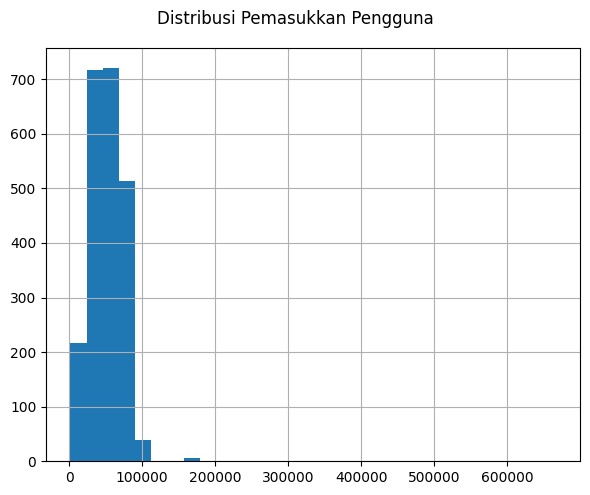

In [ ]:
df['Income'].hist(bins=30, figsize=(6, 5))
plt.suptitle('Distribusi Pemasukkan Pengguna', fontsize=12)
plt.tight_layout()
plt.show()

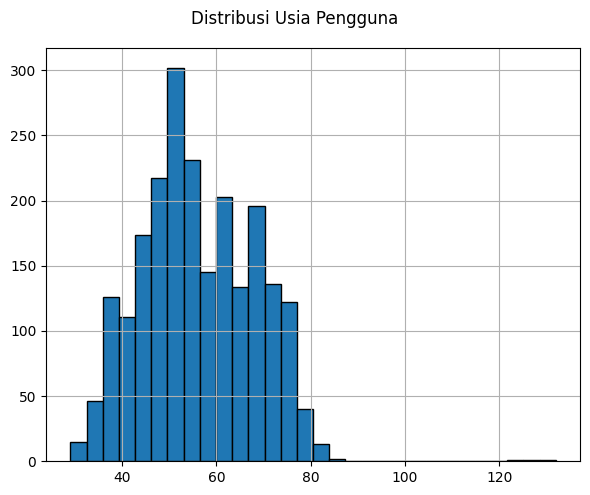

In [ ]:
df['Age'].hist(bins=30, figsize=(6, 5), edgecolor='black')
plt.suptitle('Distribusi Usia Pengguna', fontsize=12)
plt.tight_layout()
plt.show()

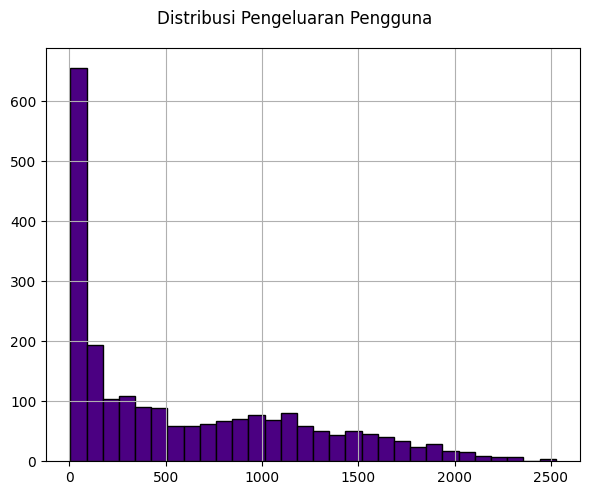

In [ ]:
df['TotalSpend'].hist(bins=30, figsize=(6, 5), color='indigo', edgecolor='black')
plt.suptitle('Distribusi Pengeluaran Pengguna', fontsize=12)
plt.tight_layout()
plt.show()

### b. Boxplot untuk Mendeteksi Outlier

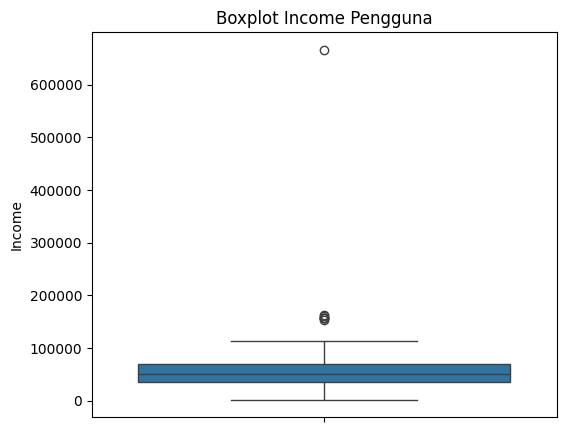

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df['Income'])
plt.title('Boxplot Income Pengguna')
plt.xticks(rotation=45)
plt.show()

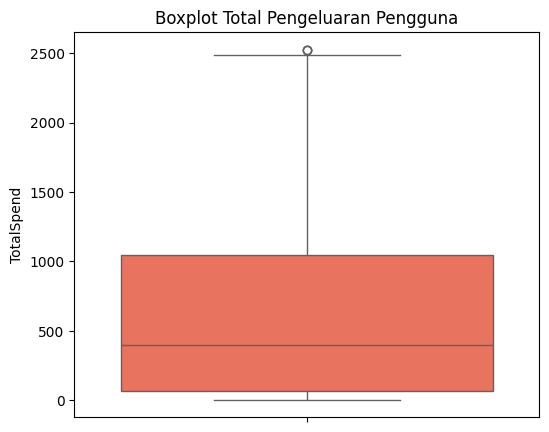

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df['TotalSpend'], color='tomato')
plt.title('Boxplot Total Pengeluaran Pengguna')
plt.xticks(rotation=45)
plt.show()

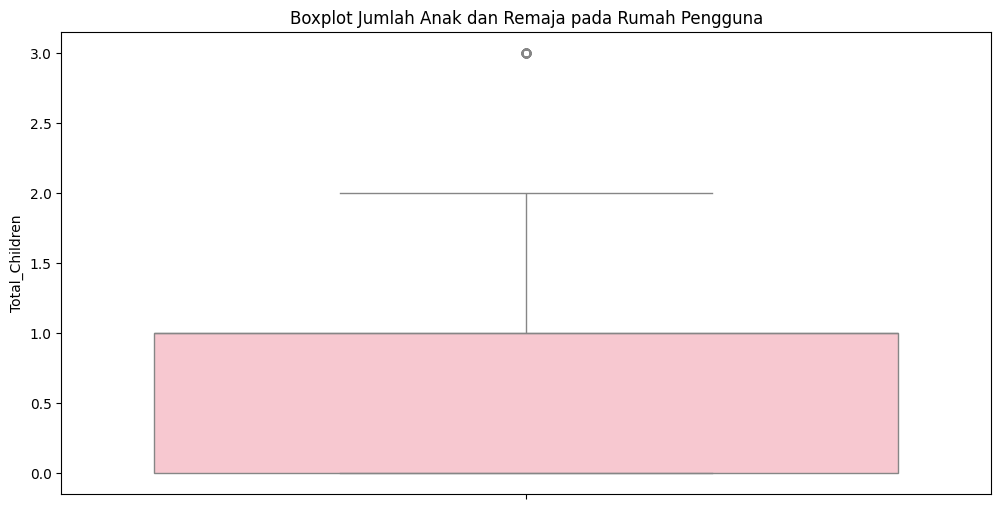

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df['Total_Children'], color='pink')
plt.title('Boxplot Jumlah Anak dan Remaja pada Rumah Pengguna')
plt.xticks(rotation=45)
plt.show()

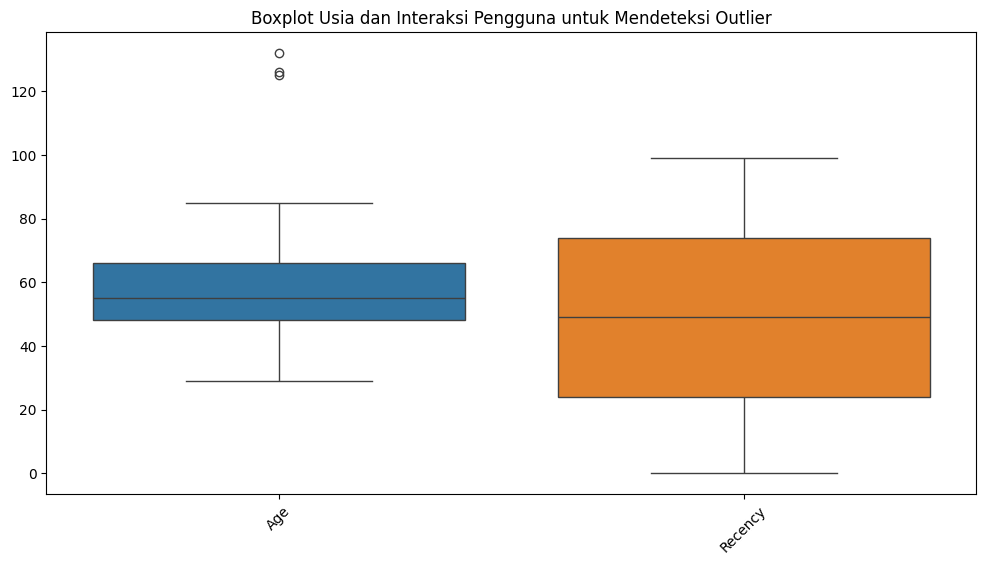

In [ ]:
num_cols = ['Age', 'Recency']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.title('Boxplot Usia dan Interaksi Pengguna untuk Mendeteksi Outlier')
plt.xticks(rotation=45)
plt.show()

### c. Korelasi Antar Variabel Numerik

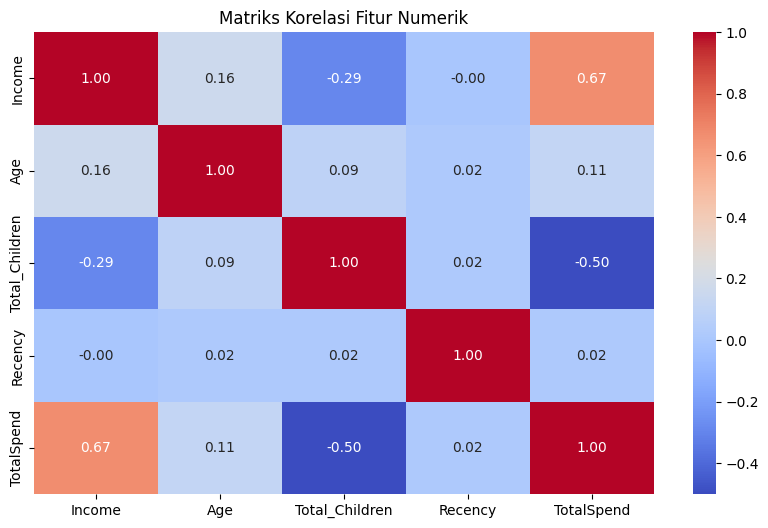

In [ ]:
num_cols = ['Income', 'Age', 'Total_Children', 'Recency', 'TotalSpend']

plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

### d. Scatterplot: Hubungan Fitur vs Target

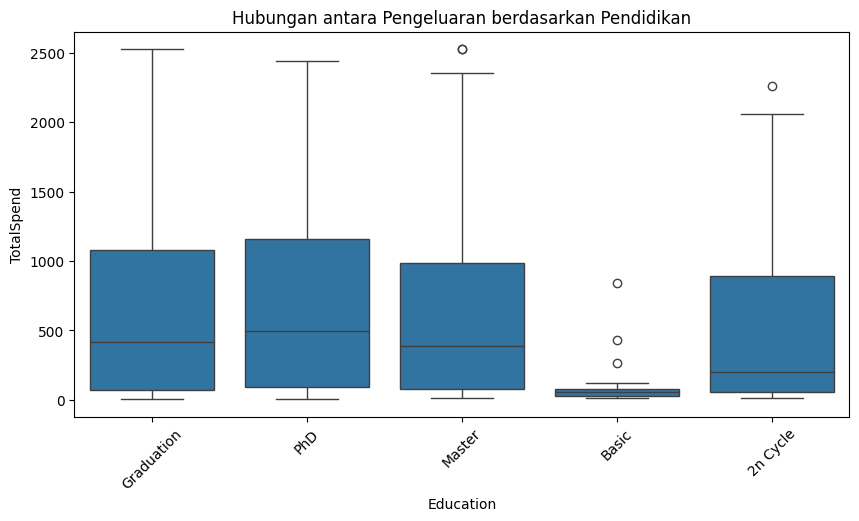

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Education', y='TotalSpend', data=df)
plt.title('Hubungan antara Pengeluaran berdasarkan Pendidikan')
plt.xticks(rotation=45)
plt.show()

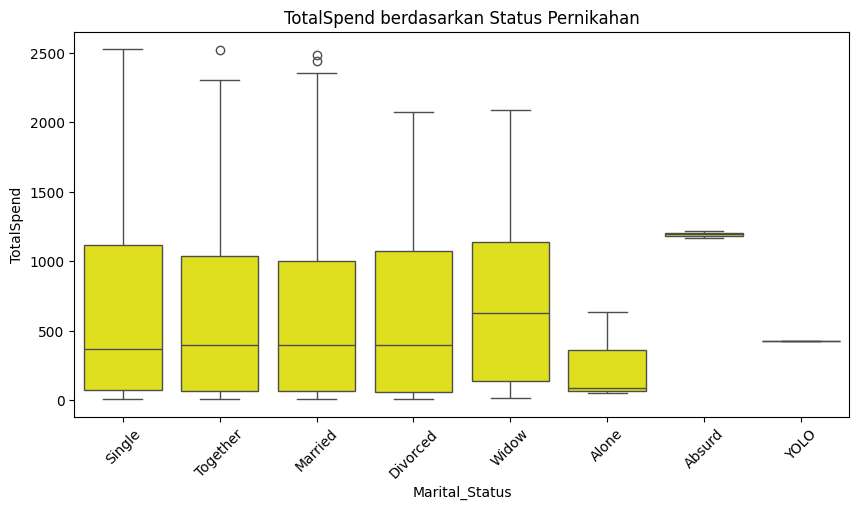

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Marital_Status', y='TotalSpend', data=df, color='yellow')
plt.title('TotalSpend berdasarkan Status Pernikahan')
plt.xticks(rotation=45)
plt.show()

### e. Distribusi Campaign yang Diterima

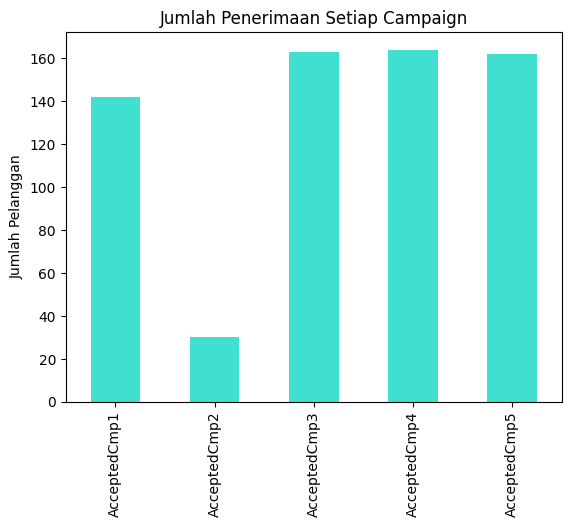

In [ ]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

df[campaign_cols].sum().plot(kind='bar', color='turquoise')
plt.title('Jumlah Penerimaan Setiap Campaign')
plt.ylabel('Jumlah Pelanggan')
plt.show()

### f. Visualisasi Usia: Histogram + Boxplot

Text(0.5, 1.0, 'Distribusi Usia')

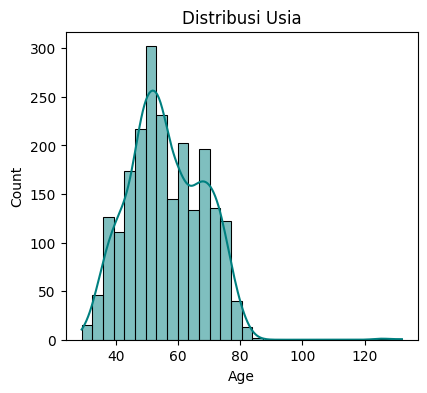

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='teal')
plt.title('Distribusi Usia')

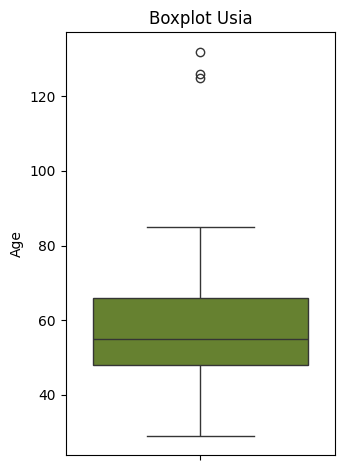

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(y='Age', data=df, color='olivedrab')
plt.title('Boxplot Usia')
plt.tight_layout()
plt.show()